In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.color import rgb2gray

In [2]:
from tools.load import load
from tools.display import disp
from tools.processor import proc
import tools.fitness as ftn
import tools.dna as dna

In [11]:
# Load and show image
data = load.image('star')
controlImg = rgb2gray(data)
disp.matrix(controlImg)

# Make some necessary measurements
(m,n) = controlImg.shape
popSize = 5

# Initialize variables
DNA = np.zeros((m,n))
bestFitness = ftn.fitness(controlImg,DNA)
evolution = []

# Start animation processing
for k in range(10000):
    
    # Initialize a population
    randomPop = dna.generateRandomPop(popSize,m,n)
    
    # Breed a new population as a result of merging previous and current random population
    popDna = dna.mergePopulationOnDna(DNA,randomPop,m,n)
    
    # Order by fitness; fitnesses[0] has the highest fitness.
    (fitnesses, popDna) = ftn.orderByFitness(popDna,controlImg)
    
    # If better fitness found
    if bestFitness > fitnesses[0]:
        
        # Retrieve the best fitness
        bestFitness = fitnesses[0]
        DNA = popDna[:,:,0]
        
        # Recolect history of DNA evolution
        evolution.append(DNA)


Retrieving star from cache


In [25]:
# Resume animation processing
for k in range(60000):
    
    # Initialize a population
    randomPop = dna.generateRandomPop(popSize,m,n)
    
    # Breed a new population as a result of merging previous and current random population
    popDna = dna.mergePopulationOnDna(DNA,randomPop,m,n)
    
    # Order by fitness; fitnesses[0] has the highest fitness.
    (fitnesses, popDna) = ftn.orderByFitness(popDna,controlImg)
    
    # If better fitness found
    if bestFitness > fitnesses[0]:
        
        # Retrieve the best fitness
        bestFitness = fitnesses[0]
        DNA = popDna[:,:,0]
        
        # Recolect history of DNA evolution
        evolution.append(DNA)


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


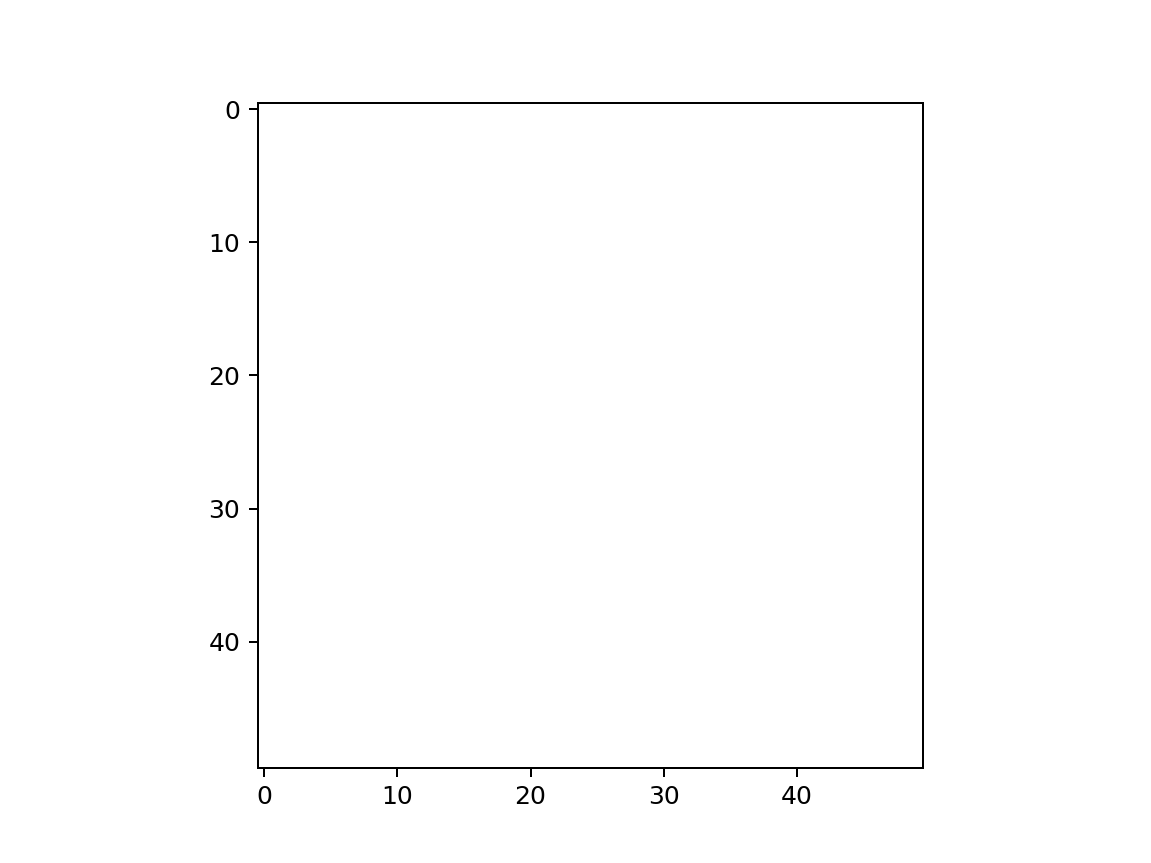

In [24]:
%matplotlib nbagg


myimages = []
fig = plt.figure()

for DNA in evolution:
    # Recolect image for animation
    implot = disp.matrix(DNA, show=False)
    myimages.append([implot])

# Animate
my_anim = animation.ArtistAnimation(fig, myimages, interval=5, blit=True, repeat_delay=1000)
plt.show()

<IPython.core.display.Javascript object>


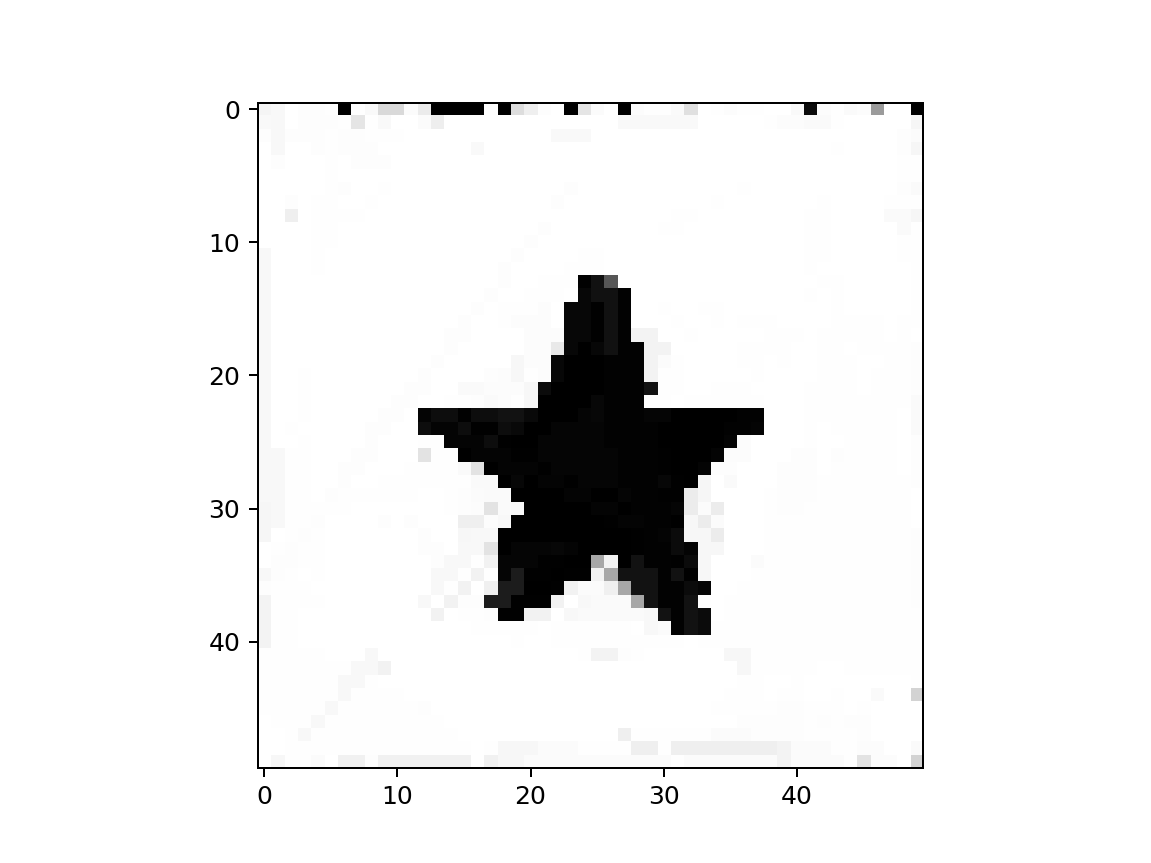

In [26]:
# save animation

myimages = []
fig = plt.figure()

for DNA in evolution:
    # Recolect image for animation
    implot = disp.matrix(DNA, show=False)
    myimages.append([implot])

# Animate
my_anim = animation.ArtistAnimation(fig, myimages, interval=5, blit=True, repeat_delay=1000)


my_anim.save('recordings/star-02.mp4')
plt.show()

In [31]:
import pickle


# obj0, obj1, obj2 are created here...
folderPath = 'storage/'


# Saving the objects:
with open(folderPath + 'star-02.pkl', 'wb') as file:  # Python 3: open(..., 'wb')
    pickle.dump(evolution, file)

# Getting back the objects:
# with open(folderPath + 'star-02.pkl') as f:  # Python 3: open(..., 'rb')
#     obj0, obj1, obj2 = pickle.load(f)